<!--NAVIGATION-->
< [Get Weight Logs](For_The_Bit_01-04_Get_Exercise_Logs.ipynb) | [Contents](For_The_Bit_00-Introduction.ipynb) |

# For The Bit

## 1. Getting my `fitbit` data
### Part VI: Construct weight measurement time series

The `fitbit` API provides a time series endpoint, but it does not have the native high precision time stamp.  In this notebook we use the `fitbit` weight and body fat % logs to construct our own native time series of weight and body fat %.

In [1]:
import pandas as pd
import json
import datetime
import dateutil
import os

### Make a table of all log measurements

Unfortunately I store both log types in the same directory.  Half the files are weight, half a fat percentage.

In [4]:
w_dir = '../data/gully/weight/logs/'
flist = os.listdir(w_dir)

In [5]:
n_files = len(flist)

In [6]:
f_files, w_files = flist[0:n_files//2], flist[n_files//2:]

### Weight logs

In [7]:
weight_df = pd.DataFrame()

In [8]:
for i, file in enumerate(w_files):
    
    with open(w_dir + file, 'r') as f:
        this_json = json.load(f)
    
    n_ids = len(this_json['weight'])
    for n in range(n_ids):
        weight_df = weight_df.append(pd.Series(this_json['weight'][n]), ignore_index=True)

In [9]:
weight_df.head()

,bmi,date,fat,logId,source,time,weight
0,23.47,2017-03-13,17.046000,1.489442e+12,Aria,21:58:28,67.8
1,23.45,2017-03-13,16.677999,1.489442e+12,Aria,22:00:57,67.7
2,23.45,2017-03-13,16.611000,1.489448e+12,Aria,23:30:33,67.7
3,23.16,2017-03-14,16.728001,1.489472e+12,Aria,06:21:35,66.9
4,23.42,2017-03-14,16.240000,1.489526e+12,Aria,21:13:59,67.6


In [10]:
weight_df['weight_lbs'] = weight_df['weight']*2.20462

In [11]:
weight_df['datetime'] = pd.to_datetime(weight_df.date+' ' +weight_df.time)

(130, 160)

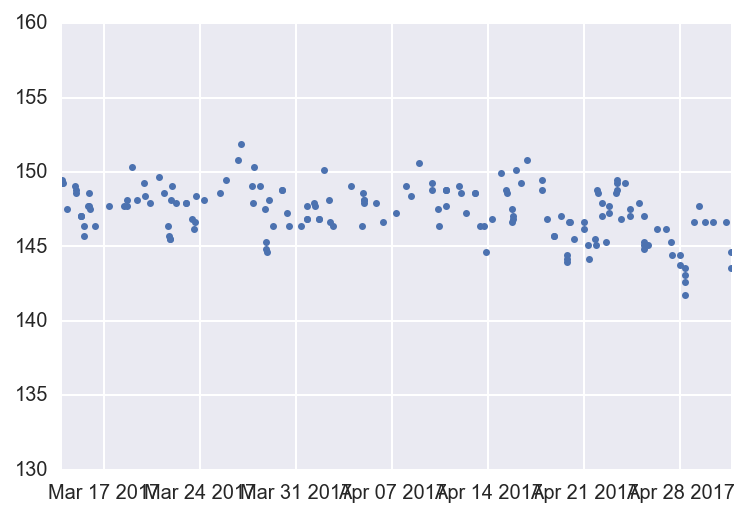

In [12]:
plt.plot(weight_df.datetime, weight_df.weight_lbs, '.')
plt.ylim(130,160)

In [13]:
weight_df.index = weight_df['datetime']
weight_df = weight_df.drop(['datetime', 'weight', 'source', 'date', 'time'], axis=1)
weight_df = weight_df[['logId', 'weight_lbs', 'fat', 'bmi']]

In [14]:
weight_df.head()

,logId,weight_lbs,fat,bmi
datetime,,,,
2017-03-13 21:58:28,1.489442e+12,149.473236,17.046000,23.47
2017-03-13 22:00:57,1.489442e+12,149.252774,16.677999,23.45
2017-03-13 23:30:33,1.489448e+12,149.252774,16.611000,23.45
2017-03-14 06:21:35,1.489472e+12,147.489078,16.728001,23.16
2017-03-14 21:13:59,1.489526e+12,149.032312,16.240000,23.42


In [15]:
weight_df.to_csv('../data/gully/weight/ts/mgs_weight_ts.csv')

## Forward filling the intraday time series?

This task is a bit subtle-- if I had weight measurements every minute, I could simply match them to my intraday heart rate data, adding a `weight` column.  In practice, I "only" weigh myself a few times a day, so I would need to *forward-fill* the weight, or otherwise perform some sort of interpolation of my weight in between my weigh-ins.  This process, in general, is a matter of inference, which is the subject of Chapter 2-- modeling.  So until I have some robust understanding of my characteristic weight variation, I am going to leave this notebook as a place holder.

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


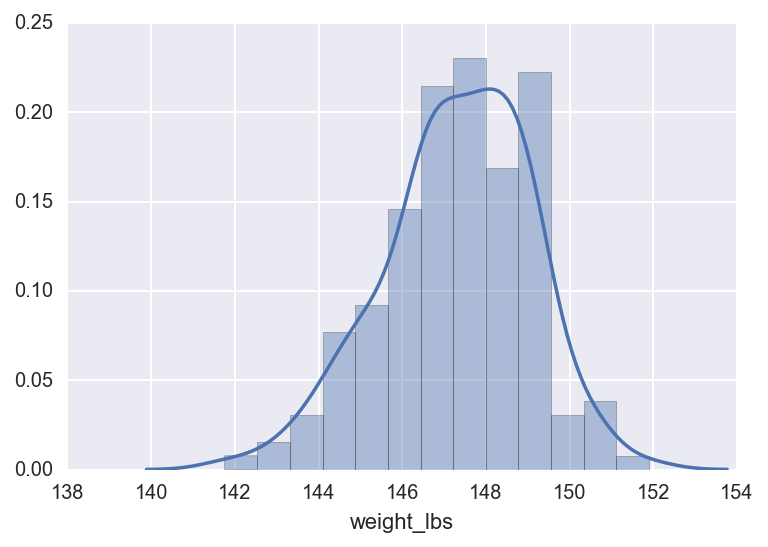

In [16]:
sns.distplot(weight_df.weight_lbs)

Warning: Not each draw is a random draw (I occasionally repeat measurements within a few minutes to gauge variance, not to mention secular trends).

## The end.